<a href="https://colab.research.google.com/github/NancyBudgujjar/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/project/Medical_Price_Dataset.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(df.isnull().sum()) #checking of any column has null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [9]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

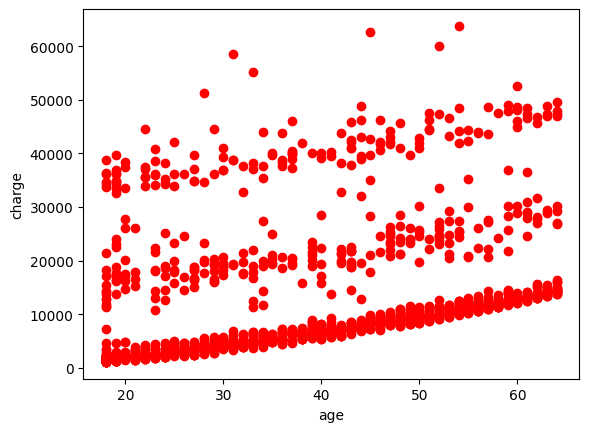

In [11]:
x = df.age.values   
y = df.charges.values 
plt.scatter(x,y, color='red')
plt.xlabel("age")
plt.ylabel("charge")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

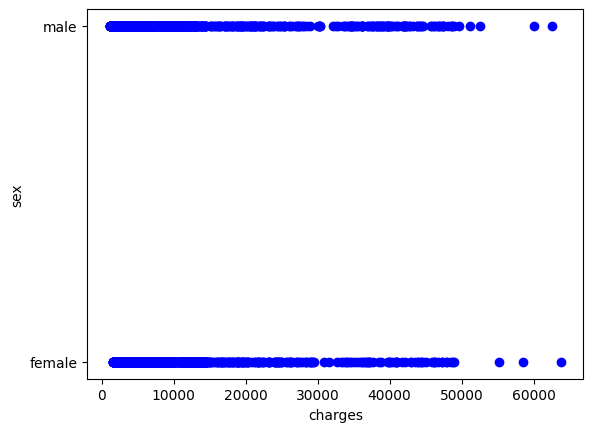

In [12]:
x = df.charges.values  
y = df.sex.values 
plt.scatter(x,y, color='blue')
plt.xlabel("charges")
plt.ylabel("sex")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

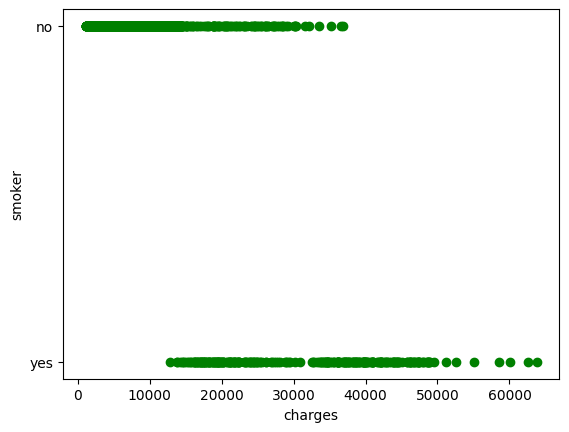

In [13]:
x = df.charges.values  
y = df.smoker.values 
plt.scatter(x,y, color='green')
plt.xlabel("charges")
plt.ylabel("smoker")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

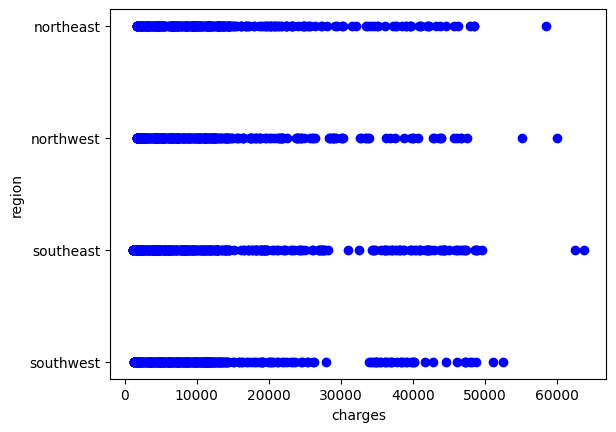

In [14]:
x = df.charges.values  
y = df.region.values 
plt.scatter(x,y, color='blue')
plt.xlabel("charges")
plt.ylabel("region")
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

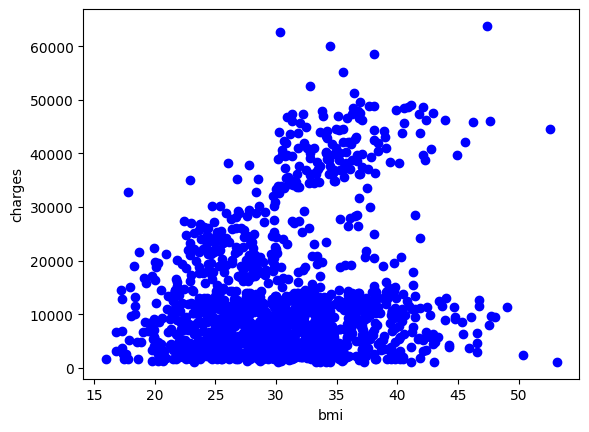

In [15]:
x = df.bmi.values 
y = df.charges.values 
plt.scatter(x,y, color='blue')
plt.xlabel("bmi")
plt.ylabel("charges")
plt.plot

In [16]:
df["sex"] = df["sex"].map({'male':0,'female':1})

In [17]:
df["smoker"] = df["smoker"].map({'no':0,'yes':1})

In [18]:
df["region"] = df["region"].map({'southwest':0,'southeast':1,'northwest':0,'northeast':1})

In [19]:
dummy = pd.get_dummies(df["region"],prefix='region')
df = pd.concat([df,dummy],axis=1)

In [20]:
df.drop("region",inplace=True,axis=1)

In [21]:
df.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1
0,19,1,27.900,0,1,16884.92400,1,0
1,18,0,33.770,1,0,1725.55230,0,1
2,28,0,33.000,3,0,4449.46200,0,1
3,33,0,22.705,0,0,21984.47061,1,0
4,32,0,28.880,0,0,3866.85520,1,0


In [45]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [46]:
split_data = int (0.8*len(df))

In [47]:
x_train, x_test = x[:split_data], x[split_data:]

In [48]:
y_train, y_test = y[:split_data], y[split_data:]